#T2.
Случайная величина имеет экспоненциальный закон распределения.
p(x) = e^(-x) {[0, +∞)}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import math

In [2]:
def p(x: float) -> float:
    # Плотность распределения
    if x >= 0:
        return np.exp(-x)
    return 0

def F(x: float) -> float:
    # Функция распределения
    if x >= 0:
        return 1 - np.exp(-x)
    return 0

def F_1(x: float) -> float:
    # Обратная функция распределения
    return -np.log(1 - x)

def Alfa_k(k: int, array: list) -> float:
    # Момент k порядка
    return np.sum([(x_i)**k for x_i in array]) / len(array)

def Mu_k(k: int, array: list) -> float:
    # Центральный момент k порядка
    return np.sum([(x_i - np.mean(array))**k for x_i in array]) / len(array)

###Генерация выборки объёма n = 25

In [17]:
np.random.seed(56)  # для воспроизводимости результатов
n = 25 # количество элементов выборки
uniform_sample = np.random.uniform(0, 1, n)
sample = F_1(uniform_sample) # Выборка
order_sample = sorted(sample) # Вариационный ряд
df = pd.DataFrame({'Выборка': sample, 'Вариационный ряд': order_sample})
print(df.to_string(index=False))

 Выборка  Вариационный ряд
4.147230          0.019928
0.405584          0.036324
1.119943          0.094415
0.218642          0.101160
0.437647          0.218642
1.678606          0.284819
0.284819          0.308317
0.613618          0.394723
2.098025          0.397195
0.497019          0.405584
0.394723          0.437647
0.094415          0.497019
1.797080          0.581370
0.101160          0.613618
1.042833          0.797406
0.797406          1.042833
1.895392          1.119943
0.308317          1.247020
0.581370          1.333162
2.127669          1.678606
1.333162          1.797080
1.247020          1.895392
0.036324          2.098025
0.019928          2.127669
0.397195          4.147230


###a) Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии

In [18]:
# Мода
if len(order_sample) != len(set(order_sample)):
    counter = [order_sample.count(order_sample[i]) for i in range(n)]
    mode = set(map(float, [order_sample[i] for i in range(n) if counter[i] == max(counter)]))
    print("Мода: ", mode)
else:
    mode = set(map(float, order_sample))
    print("Мода: (все элементы)", mode)

# Медиана
if n % 2 == 0:
    median = (order_sample[n//2] + order_sample[(n // 2) - 1]) / 2
else:
    median = (order_sample[n//2])
print("Медиана:", median)

# Размах
scope = order_sample[-1] - order_sample[0]
print("Размах:", scope)

# Коэффициент асимметрии
gamma = Mu_k(3, order_sample) / (Mu_k(2, order_sample) ** 1.5)
print("Коэффициент асимметрии:", gamma)

Мода: (все элементы) {0.2186417212923042, 0.2848189132218628, 0.308316598464857, 0.39472314070712244, 0.3971947092003469, 0.40558351413986193, 0.43764713586958737, 0.6136178202811876, 1.3331620376057822, 0.49701881323269187, 1.0428325573833075, 2.0980245124757184, 4.1472296834778435, 1.2470196240244589, 1.6786055483810804, 0.10116002225339295, 1.8953917584006956, 2.127669077111499, 1.1199430544609565, 0.581370271849141, 1.7970800982472985, 0.03632376106941663, 0.09441520168489458, 0.019928488737761586, 0.7974060551745888}
Медиана: 0.581370271849141
Размах: 4.127301194740082
Коэффициент асимметрии: 1.6700128620567058


###b) Построить эмпирическую функцию распределения, гистограмму и boxplot

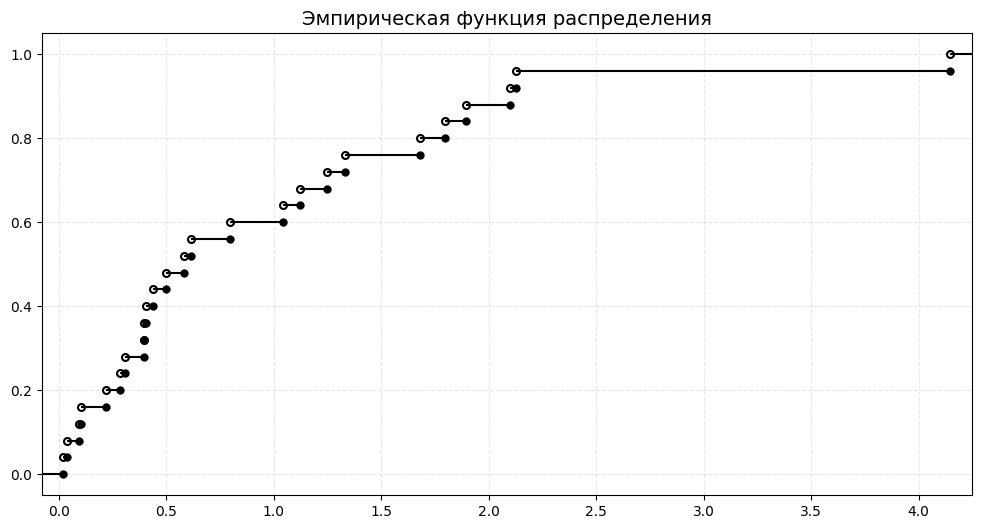

In [19]:
# Эмпирическая функция распределения
def draw_empirical_function(data: list, number: int, x_padding=0.5):
    data = np.asarray(data)
    data_sorted = np.sort(data)

    fig, ax = plt.subplots(figsize=(12, 6))

    x_min = data_sorted[0] - x_padding
    x_max = data_sorted[-1] + x_padding
    ax.hlines(y=0, xmin=x_min, xmax=data_sorted[0], color='black', linewidth=1.5)

    current_height = 0
    unique_values = []
    unique_counts = []
    unique, counts = np.unique(data_sorted, return_counts=True)

    for i, (val, count) in enumerate(zip(unique, counts)):
        new_height = current_height + count / number

        ax.plot(val, current_height, 'o', color='black', markersize=5,
                markeredgecolor='black', markerfacecolor='black')

        if i == 0:
            ax.hlines(y=current_height, xmin=data_sorted[0], xmax=val, color='black', linewidth=1.5)
        else:
            ax.hlines(y=current_height, xmin=unique[i-1], xmax=val, color='black', linewidth=1.5)

        ax.plot(val, new_height, 'o', color='black', markersize=5,
                markeredgecolor='black', markerfacecolor='white', markeredgewidth=1.5)
        current_height = new_height

    ax.hlines(y=1, xmin=data_sorted[-1], xmax=x_max, color='black', linewidth=1.5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(-0.05, 1.05)
    ax.set_title('Эмпирическая функция распределения', fontsize=14)
    ax.grid(True, alpha=0.3, linestyle='--')

    return fig, ax


fig1, ax1 = draw_empirical_function(sample, n, x_padding=0.1)
plt.show()

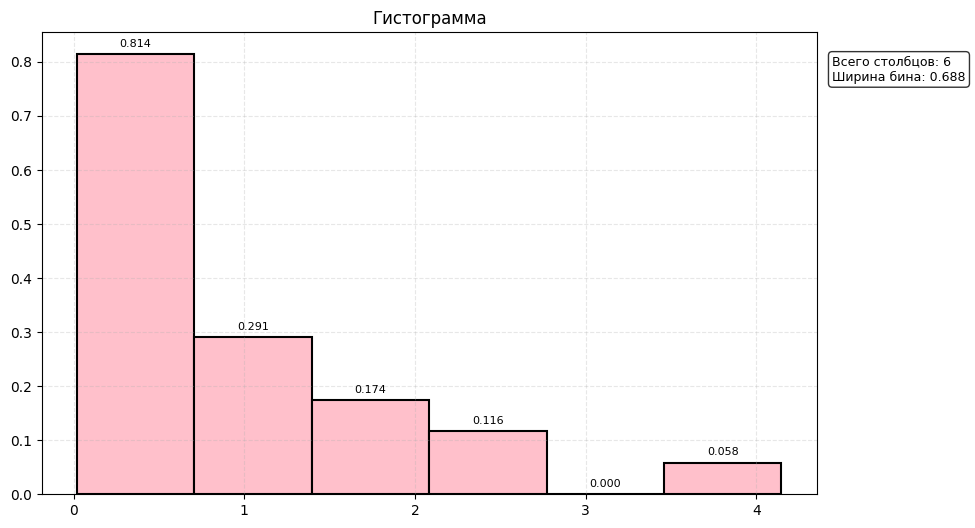

In [20]:
# Гистограмма
def draw_histogram(data: list, n_bins: int, number: int):
    data = np.asarray(data)

    data_min = np.min(data)
    data_max = np.max(data)

    bin_width = (data_max - data_min) / n_bins

    bin_edges = np.linspace(data_min, data_max, n_bins + 1)

    counts = np.zeros(n_bins)

    for i in range(n_bins):
        left_edge = bin_edges[i]
        right_edge = bin_edges[i + 1]

        if i == n_bins - 1:
            mask = (data >= left_edge) & (data <= right_edge)
        else:
            mask = (data >= left_edge) & (data < right_edge)

        counts[i] = np.sum(mask)

    heights = counts / (bin_width * number)
    fig, ax = plt.subplots(figsize=(10, 6))

    patches = []
    for i in range(n_bins):
        left = bin_edges[i]
        width = bin_width
        height = heights[i]

        rect = ax.bar(left, height, width,
                     align='edge',
                     facecolor='pink',
                     edgecolor='black',
                     linewidth=1.5)
        patches.extend(rect)

        ax.text(left + width/2, height + 0.01,
                   f'{height:.3f}',
                   ha='center', va='bottom',
                   fontsize=8)

    ax.grid(True, alpha=0.3, linestyle='--')

    info_text = f'Всего столбцов: {n_bins}\nШирина бина: {bin_width:.3f}'
    ax.text(1.02, 0.95, info_text, transform=ax.transAxes,
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
           fontsize=9)

    return fig, ax, counts, bin_edges, patches



fig, ax, counts, bin_edges, patches = draw_histogram(order_sample, int(np.ceil(1 + np.log2(n))), n)
ax.set_title("Гистограмма")
plt.show()

In [21]:
# Расчет квартилей
if n % 4 == 0:
    q1 = (order_sample[n // 4] + order_sample[(n // 4) - 1]) / 2
    q3 = (order_sample[3 * (n // 4)] + order_sample[(3 * (n // 4)) - 1]) / 2
elif n % 2 == 0:
    q1 = order_sample[n // 4]
    q3 = order_sample[(3*(n // 4)) + 1]
else:
    if (n // 2) % 2 == 0:
        q1 = (order_sample[(n // 2) // 2] + order_sample[((n // 2) // 2) - 1]) / 2
        q3 = (order_sample[3 * ((n // 2) // 2)] + order_sample[3 * ((n // 2) // 2) + 1]) / 2
    else:
        q1 = order_sample[(n // 2) // 2]
        q3 = order_sample[3 * ((n // 2) // 2) + 2]

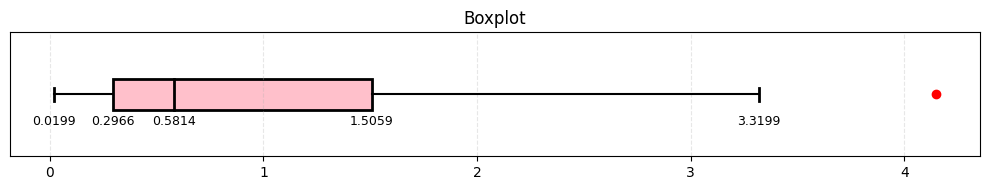

In [22]:
# Boxplot
def draw_boxplot(data: list, q1: float, median: float, q3: float, show_outliers=True, figsize=(10, 2)):
    fig, ax = plt.subplots(figsize=figsize)
    box_height = 0.5
    box_y_center = 0

    IQR = q3 - q1
    whisker_min = q1 - 1.5 * IQR
    whisker_max = q3 + 1.5 * IQR

    rect = plt.Rectangle((q1, -box_height/2),
                        q3 - q1,
                        box_height,
                        facecolor='pink',
                        edgecolor='black',
                        linewidth=2)
    ax.add_patch(rect)

    ax.plot([median, median], [-box_height/2, box_height/2],
            color='black', linewidth=2, label=f'Медиана = {median:.2f}')

    if show_outliers and data is not None:
        array = np.asarray(data)
        outliers_min = array[(array < whisker_min)]
        outliers_max = array[(array > whisker_max)]
        outliers = np.hstack((outliers_min, outliers_max))
        if len(outliers) > 0:
            ax.scatter(outliers, np.zeros_like(outliers),
                      color='red', marker='o', zorder=3,
                      label=f'Выбросы (n={len(outliers)})')
        if outliers_min.size == 0:
            whisker_min = data[0]
        if outliers_max.size == 0:
            whisker_max = data[-1]

    ax.plot([q1, whisker_min], [0, 0],
            color='black', linewidth=1.5, linestyle='-')

    ax.plot([q3, whisker_max], [0, 0],
            color='black', linewidth=1.5, linestyle='-')

    tick_height = 0.2
    ax.plot([whisker_min, whisker_min], [-tick_height/2, tick_height/2],
            color='black', linewidth=2)

    ax.plot([whisker_max, whisker_max], [-tick_height/2, tick_height/2],
            color='black', linewidth=2)

    ax.text(q1, -0.5, f'{q1:.4f}', ha='center', fontsize=9)
    ax.text(q3, -0.5, f'{q3:.4f}', ha='center', fontsize=9)
    ax.text(median, -0.5, f'{median:.4f}', ha='center', fontsize=9)
    ax.text(whisker_min, -0.5, f'{whisker_min:.4f}', ha='center', fontsize=9)
    ax.text(whisker_max, -0.5, f'{whisker_max:.4f}', ha='center', fontsize=9)

    ax.set_title("Boxplot")
    ax.set_ylim(-1, 1)
    ax.get_yaxis().set_visible(False)
    ax.grid(True, axis='x', alpha=0.3, linestyle='--')

    plt.tight_layout()
    return fig, ax

draw_boxplot(order_sample, q1, median, q3)
plt.show()

###c) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

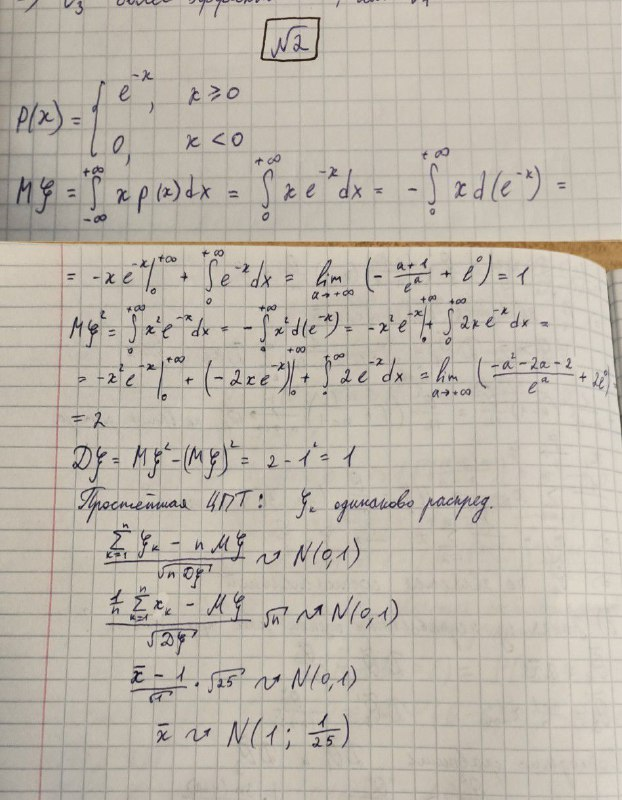

In [23]:
# Количество повторений для bootstrap
N = 1000

# Параметры нормального распределения N(1, 1/25)
a = 1
sigma = 1 / 5

# Выборки bootstrap
bs_samples = sample[np.random.choice(n, size=(N, n))]

# Полученные средние значения bootstrap
bs_means = np.mean(bs_samples, axis=1)

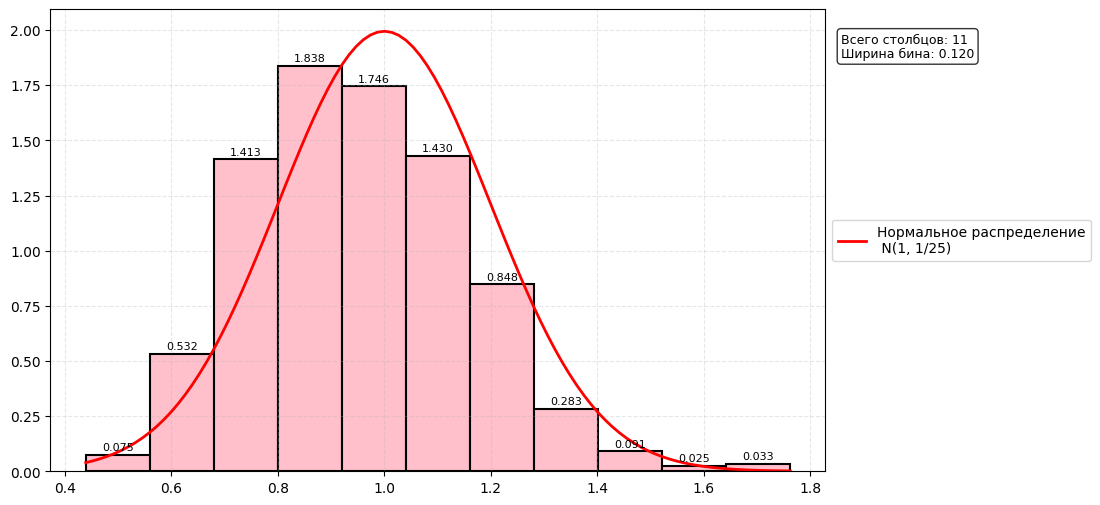

In [24]:
# Сравнение оценок
fig, ax, counts, bin_edges, patches = draw_histogram(bs_means, int(np.ceil(1 + np.log2(N))), N)
x = np.linspace(min(bs_means), max(bs_means), 100)
y = norm.pdf(x, a, sigma)

ax.plot(x, y, 'r-', linewidth=2, label=f'Нормальное распределение\n N(1, 1/25)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

###d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1

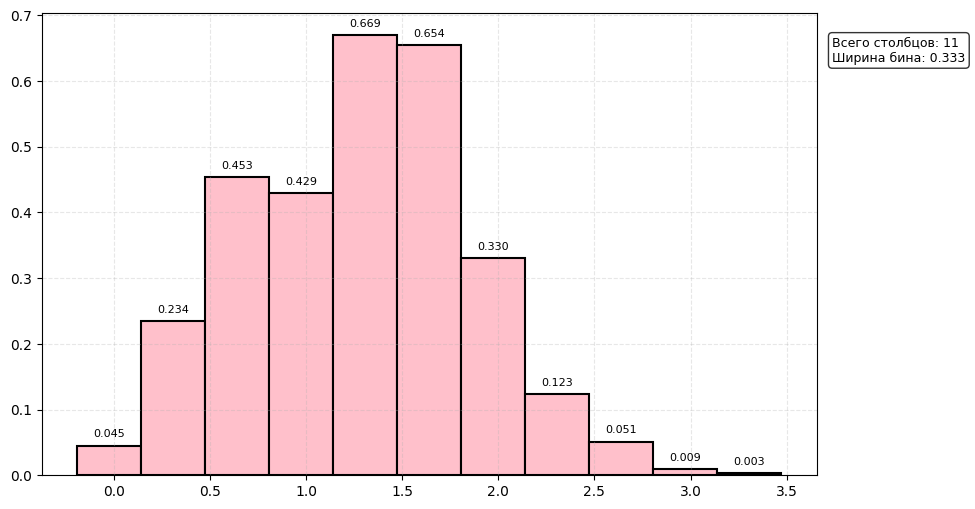

In [25]:
bs_asym_coef = [] # Получится набор коэффициентов ассиметрии

for _ in range(N):
    bs_sample = np.random.choice(sample, size=n).tolist() # выборка bootstrap
    bs_asym_coef.append(Mu_k(3, bs_sample) / (Mu_k(2, bs_sample) ** 1.5)) # Расчет коэффициентов ассиметрии

# Гистограмма для оценки плотности
fig, ax, counts, bin_edges, patches = draw_histogram(bs_asym_coef, int(np.ceil(1 + np.log2(N))), N)
plt.show()

In [26]:
# Оценить вероятность, что коэффициент ассиметри будет меньше 1
which_less_one = [1 if bs_asym_coef[i] < 1 else 0 for i in range(N)]
probability = np.sum(which_less_one) / N
print(f"Вероятность того, что коэффициент ассиметрии будет меньше 1 равна {probability}")

Вероятность того, что коэффициент ассиметрии будет меньше 1 равна 0.322


###e) Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

In [27]:
# Нахождение медианы
def mediana(data: list) -> float:
    data = sorted(data)
    if n % 2 == 0:
        return (data[n//2] + data[(n // 2) - 1]) / 2
    else:
        return data[n//2]

In [33]:
# Bootstrap
bs_asym_coef = [] # Получится набор медиан

for _ in range(N):
    bs_sample = np.random.choice(sample, size=n).tolist() # выборка bootstrap
    bs_asym_coef.append(mediana(bs_sample)) # Расчет медианы

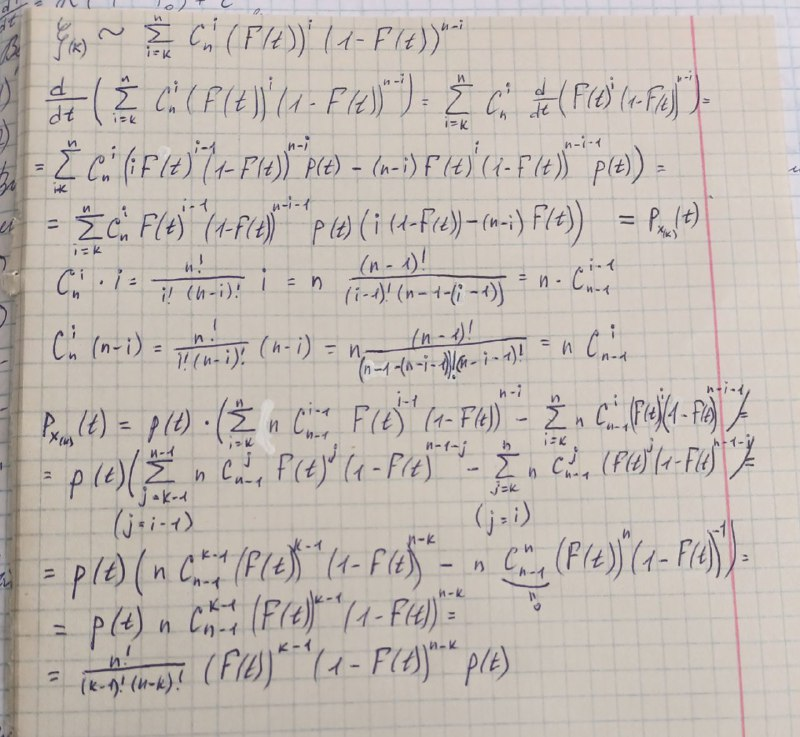

In [29]:
# Так как выборка из 25 элементов (нечётное количество), то медиана это 13 порядковая статистика
def k_ordinal_statistics_density(k, F_, p_, n_, t):
    coef = math.factorial(n_) / (math.factorial(k - 1) * math.factorial(n_ - k))
    return coef * (F_(t)) ** (k - 1) * (1 - F_(t)) ** (n_ - k) * p_(t)

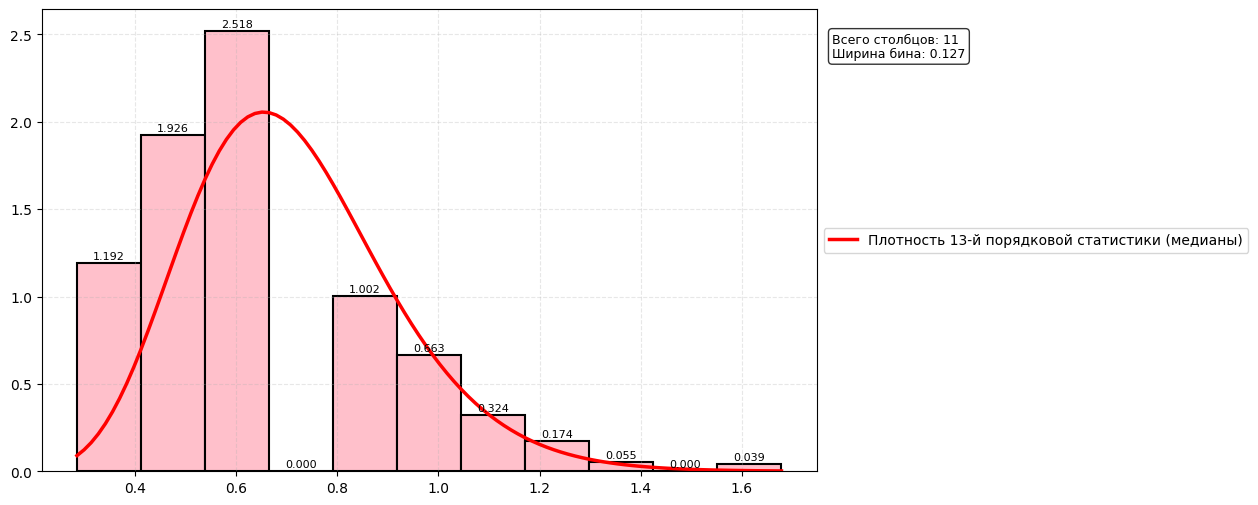

In [34]:
# График для сравнения
fig, ax, counts, bin_edges, patches = draw_histogram(bs_asym_coef, int(np.ceil(1 + np.log2(N))), N)
x = np.linspace(min(bs_asym_coef), max(bs_asym_coef), 100)
y = [k_ordinal_statistics_density(k=n//2 + 1, F_=F, p_=p, n_=n, t=elem) for elem in x]

ax.plot(x, y, 'r-', linewidth=2.5, label=f'Плотность {n//2 + 1}-й порядковой статистики (медианы)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()